# Procesando datos en Python

### Instituto Data Science, Universidad del Desarrollo

Prof. Diego Caro (dcaro en el dominio udd.cl).

https://twitter.com/diegocaro

https://github.com/diegocaro


# La clase de hoy

![pandas](http://pandas.pydata.org/_static/pandas_logo.png)

* Introducción a Pandas para análisis de datos.
* Pandas es un módulo de Python para realizar análisis de datos http://pandas.pydata.org/


Esta presentación basada en el trabajo de Jake VanDerPlas https://github.com/jakevdp/PythonDataScienceHandbook. Bajo licencia CC0.

In [1]:
import pandas as pd

# Series

* Una serie es una colección de valores.

In [2]:
pd.Series(['Santiago', 'Concepción', 'Valparaíso'])

0      Santiago
1    Concepción
2    Valparaíso
dtype: object

* Están compuestos por un índice y valores

In [3]:
s = pd.Series([0.25, 0.5, 0.75, 1.0])
s

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
s.values

array([ 0.25,  0.5 ,  0.75,  1.  ])

# Operaciones sobre Series

* Operaciones aritméticas a cada elemento de la serie (como un vector de matlab)
    * Suma, resta, división, etc... 
    * Más info en https://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [6]:
s + 50 # suma 50 a cada valor de la serie

0    50.25
1    50.50
2    50.75
3    51.00
dtype: float64

In [7]:
s * 3.1416

0    0.7854
1    1.5708
2    2.3562
3    3.1416
dtype: float64

* También podemos realizar operaciones entre dos series (deben ser del mismo tamaño)

In [8]:
h = pd.Series([-100, -99, -98, -97])
h

0   -100
1    -99
2    -98
3    -97
dtype: int64

In [9]:
s + h

0   -99.75
1   -98.50
2   -97.25
3   -96.00
dtype: float64

* Y también se pueden realizar operaciones sobre todos los valores

In [10]:
s.sum() 

2.5

In [11]:
s.mean() 

0.625

In [12]:
s.std() 

0.3227486121839514

# Consultando series

* Podemos recuperar elementos de la serie indicando su posición (recuperar el i-ésimo elemento)

In [13]:
s = pd.Series([0.25, 0.5, 0.75, 1.0])

In [14]:
s.loc[2] #recupera el segundo elemento de s

0.75

In [15]:
s.loc[2:3] # recupera un rango de elementos

2    0.75
3    1.00
dtype: float64

* Y también podemos seleccionar por alguna condición sobre los valores

In [16]:
s[s > 0.4] # puede usar cualquier operador de comparación

1    0.50
2    0.75
3    1.00
dtype: float64

* El operador de comparación devuelve una serie de True/False
    * Todas las posiciones que son True se seleccionan

In [17]:
s > 0.4

0    False
1     True
2     True
3     True
dtype: bool

# Dataframe

* Es una tabla (si, como las de Excel), donde cada columna es una Serie.

In [18]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
df = pd.DataFrame({'area':area, 'pop':pop})
df

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


* Las columnas se pueden seleccionar con el operador corchete.

In [19]:
type(df['area']) 

pandas.core.series.Series

In [20]:
df['area'] # y también con data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

* Y como cada columna es una Serie... podemos realizar operaciones de Series!

In [21]:
df['area'] / 1000

California    423.967
Florida       170.312
Illinois      149.995
New York      141.297
Texas         695.662
Name: area, dtype: float64

# Consultando datos en un Dataframe

In [22]:
df.head(3)

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [23]:
df.tail(3)

,area,pop
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


* Podemos usar el operador loc[] para recuperar una fila:

In [24]:
df.loc['California']

area      423967
pop     38332521
Name: California, dtype: int64

# Manipulando columnas

* Agregar una columna:

In [26]:
# puedes asignar nuevas columnas
df['density'] = df['pop'] / df['area'] # osom, no?
df

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


* Y borrar columnas:

In [28]:
copy_data = df.drop(['area'], axis='columns')
copy_data

,pop,density
California,38332521,90.413926
Florida,19552860,114.806121
Illinois,12882135,85.883763
New York,19651127,139.076746
Texas,26448193,38.018740


## Cargando y filtrando datos

* Pandas también puede abrir varios tipos de archivo, nosotros usaremos CSV.
* Más info sobre otro formatos (excel, json, xml...) https://pandas.pydata.org/pandas-docs/stable/io.html 

In [29]:
df = pd.read_csv('gini_by_country.csv')
df.head()

,country,gini
0,Slovenia,0.251
1,Denmark,0.256
2,Slovak Republic,0.247
3,Czech Republic,0.257
4,Iceland,0.246


* Se pueden recuperar filas que cumple condiciones sobre las columnas:
* Ejemplo: ¿Cuáles son los paises con gini menor a 0.25?

In [30]:
df[df.gini < 0.25] # los paises con menos desigualdad

,country,gini
2,Slovak Republic,0.247
4,Iceland,0.246


In [31]:
menos_desiguales = df[df.gini < 0.25]
len(menos_desiguales)

2

Las condiciones se pueden mezclar con el operador or, and y not.

| Operación | Python (`if`) | Pandas |
|-----------|--------------|-----------|
| Disyunción | or | &#124; |
| Conjunción | and | & |
| Negación | not | ~ |

Pregunta: ¿ Cuáles son los países con Gini menos a 0.25 y mayores a 0.5?

In [32]:
extremos = df[(df.gini < 0.25) | (df.gini > 0.5)] # debes agrupar condiciones con paréntesis
extremos

,country,gini
2,Slovak Republic,0.247
4,Iceland,0.246
38,China (People's Republic of),0.556
41,South Africa,0.620


¿Y cuales están entre 0.25 y 0.5?

In [33]:
noextremos = df[(df.gini > 0.25) & (df.gini < 0.5)]
noextremos.head()

,country,gini
0,Slovenia,0.251
1,Denmark,0.256
3,Czech Republic,0.257
5,Norway,0.257
6,Finland,0.257


* Pregunta: ¿Cuántos países están en los extremos?

In [34]:
noextremos.shape # (num. filas, num. columnas)

(38, 2)

In [35]:
noextremos

,country,gini
0,Slovenia,0.251
1,Denmark,0.256
3,Czech Republic,0.257
5,Norway,0.257
6,Finland,0.257
7,Belgium,0.266
8,Austria,0.274
9,Germany,0.289
10,Hungary,0.288
11,Poland,0.298


# Operaciones sobre Dataframes
Pandas incorpora operaciones estadísticas básicas. Ver vás en https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics 

In [36]:
df = pd.read_csv('gini_by_year_clean.csv')
df.head(2)

,country,year,gini
0,Australia,1981,0.3133
1,Brazil,1981,0.5793


In [37]:
df.describe()

,year,gini
count,1268.000000,1268.000000
mean,2003.068612,0.398323
std,7.611265,0.100327
min,1981.000000,0.162300
25%,1998.000000,0.317175
50%,2005.000000,0.384250
75%,2009.000000,0.475250
max,2014.000000,0.657600


## Ordenar

In [38]:
df_sorted = df.sort_values('gini',ascending=False) # o puede ser ascending=True
df_sorted.head()

,country,year,gini
277,Malawi,1997,0.6576
759,South Africa,2006,0.6479
451,Botswana,2002,0.6473
1127,South Africa,2011,0.6338
523,Namibia,2003,0.6332


## Contar

In [39]:
df.country.value_counts() #retorna el numero de filas por 'country'

Brazil                 30
Costa Rica             28
Honduras               26
Argentina              26
Uruguay                22
Poland                 22
Panama                 21
El Salvador            20
Belarus                20
Moldova                20
Peru                   20
Georgia                19
Romania                19
Ukraine                19
Dominican Republic     19
Thailand               19
Colombia               19
Russian Federation     19
Ecuador                18
Lithuania              18
Hungary                18
Kyrgyz Republic        18
Paraguay               18
Latvia                 17
Bolivia                17
Estonia                17
Armenia                16
Kazakhstan             16
Mexico                 15
Bulgaria               14
                       ..
Papua New Guinea        2
Trinidad and Tobago     2
Gambia, The             2
Chad                    2
Haiti                   2
China                   2
Maldives                2
Mauritius   

## Visualizar datos

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

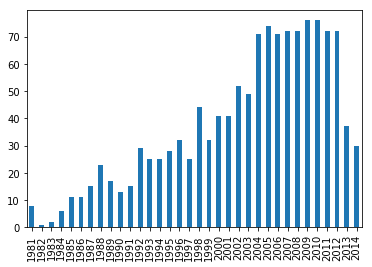

In [41]:
df.year.value_counts().sort_index().plot(kind='bar');

* Variación del Coef. de Gini de Chile por año:

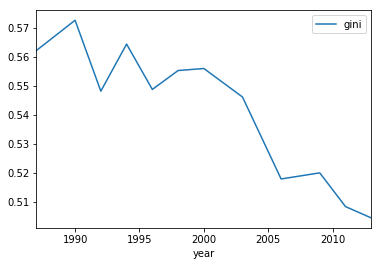

In [42]:
df[df.country=='Chile'].plot(x='year',y='gini');

* ¿Se te ocurre algo que se pueda mejorar de este gráfico?

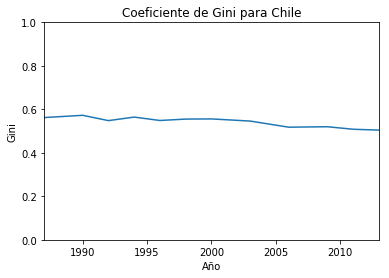

In [43]:
df[df.country=='Chile'].plot(x='year', y='gini', title='Coeficiente de Gini para Chile', legend=False);
plt.ylabel('Gini')
plt.xlabel('Año')
plt.ylim(0,1);

# 🎉🎉🎉